In [23]:
from lib.utils import *

In [24]:
raw = load_raw(10)
df = load_psd(10)
eeg = raw.get_data(picks='EEG')[0]
eeg = remove_outliers_from_eeg(eeg)

In [25]:
eeg = pd.DataFrame(eeg.reshape(int(len(eeg)/5000),500*10))
df = pd.concat([df['label'],eeg],axis=1)

In [26]:
w = df[df['label'] == 'W'].drop('label',axis=1).to_numpy().flatten()
p = df[df['label'] == 'P'].drop('label',axis=1).to_numpy().flatten()
s = df[df['label'] == 'S'].drop('label',axis=1).to_numpy().flatten()

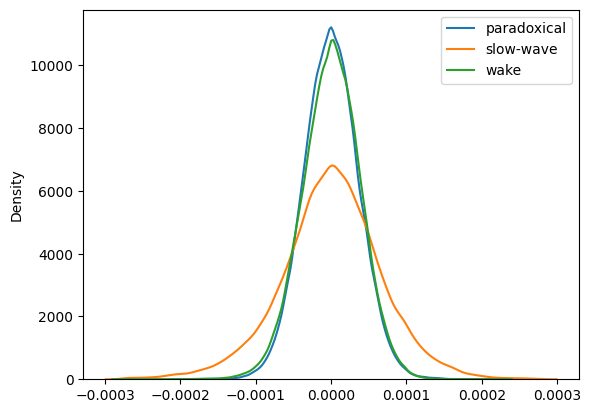

In [27]:
sns.kdeplot(p[:100000],label='paradoxical')
sns.kdeplot(s[:100000],label='slow-wave')
sns.kdeplot(w[:100000],label='wake')
plt.legend()